In [ ]:
# Global Educational Dataset:
  # Source: https://www.kaggle.com/datasets/nelgiriyewithana/world-educational-data/
  # Detailed dataset containing data points for several variables.

  # Cols 01 - 03: Geographic location data for each row.
  # Cols 04 - 11: OOSR* - males & females, across grade levles**.
  # Cols 12 - 17:   CR* - males & females, across grade levels.
  # Cols 18 - 23:   PR* - males & females, reading & math, across grade levels.
  # Cols 24 - 25:   LR* - males & females, ages 15 - 24.
  # Cols 26 - 26:   BR* - birth rate for each region.
  # Cols 27 - 28:   ER* - gross enrollment in primary & tertiary education.
  # Cols 29 - 29:   UR* - unemployment rates for each region.

    # *OOSR: Out Of School Rate,
    # *CR: Completion Rate
    # *PR: Proficiency Rate
    # *LR: Literacy Rate
    # *BR: Birth Rate
    # *ER: enrollment rate
    # *UR: Unemployment Rate
    # **Grade Levels: Pre-primary, primary, lower secondary, upper secondary

                          ############

# Are education levels significantly related to unemployment rates?
    # Ho = Education and unemployment are not significantly related.
    # Ha = Education and unemployment are significantly related.

    # Is there a statistic that appears to correlate with UR?

    # Is primary/tertiary enrollment significantly related to UR?
        # Do regions with higher than mean tertiary ER have lower than mean UR?
        # Do regions with lower than mean tertiary ER have higher than mean UR?

    # What can be inferred about the US job market from this data?
        # Does the US have higher or lower than mean UR?
        # Does the US have higher or lower than mean tertiary ER?


In [ ]:
# import required libraries
import pandas as pd                # statistic calc
import matplotlib.pyplot as plt    # visualizations
from scipy.stats import ttest_ind  # hypoth testing

In [ ]:
# read csv, load data to Pandas DataFrame obj
f = "/content/drive/MyDrive/Data1501/Datasets/Global_Education.csv"
raw_csv = pd.read_csv(f, encoding='ISO-8859-1')
df = pd.DataFrame(raw_csv)
df.shape  # get rows, columns numbers

(202, 29)

In [ ]:
df.head()  # get top 5 rows for initial exploration

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


In [ ]:
df.describe() # get basic stats of dataset

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,25.081422,55.166928,19.658416,19.282178,5.282178,5.569307,8.707921,8.831683,20.292079,19.975248,...,10.717822,10.376238,25.787129,24.450495,35.801980,35.084158,18.914010,94.942574,34.392574,6.000000
std,16.813639,45.976287,25.007604,25.171147,9.396442,10.383092,13.258203,14.724717,21.485592,23.140376,...,24.866101,22.484423,33.181384,31.965467,45.535186,45.249643,10.828184,29.769338,29.978206,5.273136
min,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.685062,18.665678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.355000,97.200000,9.000000,2.302500
50%,21.207861,43.518091,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.550000,101.850000,24.850000,4.585000
75%,39.901792,77.684945,31.000000,30.000000,6.000000,6.750000,12.750000,10.750000,32.750000,30.000000,...,0.000000,0.000000,56.750000,50.750000,94.000000,96.750000,27.692500,107.300000,59.975000,8.655000
max,64.963051,178.065032,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,...,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000


In [ ]:
# get mean unemployment rate
mean_UR = df['Unemployment_Rate'].mean()
mean_UR  # output returned value

6.0

In [ ]:
# get mean primary enrollment enrollment rate
mean_prim = df['Gross_Primary_Education_Enrollment'].mean()
mean_prim  # output return

94.94257425742575

In [ ]:
# get mean tertiary enrollment rate
mean_tert = df['Gross_Tertiary_Education_Enrollment'].mean()
mean_tert  # output return

34.39257425742574

In [ ]:
# filter out US data
usa = df.loc[df['Countries and areas'] == "United States"]
print(usa.values)  # output row

[['United States' 37.09024 95.712891 12 8 1 1 3 1 4 3 0 0 0 0 0 0 0 0 0 0
  81 73 0 0 11.6 101.8 88.2 14.7]]


In [ ]:
# get USA values for unemployment/tertiary enrollment/primary enrollment
usa_UR = usa.Unemployment_Rate.values[0]
usa_prim = usa.Gross_Primary_Education_Enrollment.values[0]
usa_tert = usa.Gross_Tertiary_Education_Enrollment.values[0]

In [ ]:
# print out comparison
print(f"Mean unemployment rate for all countries: {mean_UR}")
print(f"Unemployment rate for US: {usa_UR}\n")

print(f"Mean primary enrollment rate: {mean_prim}")
print(f"US primary enrollment rate = {usa_prim}\n")

print(f"Mean post-secondary enrollment rate: {mean_tert}")
print(f"US post-secondary enrollment rate = {usa_tert}")

Mean unemployment rate for all countries: 6.0
Unemployment rate for US: 14.7

Mean primary enrollment rate: 94.94257425742575
US primary enrollment rate = 101.8

Mean post-secondary enrollment rate: 34.39257425742574
US post-secondary enrollment rate = 88.2


In [ ]:
# ANALYSIS:
  # From this data, it would appear that the US is an outlier.
  # The US has higher than mean unemployment rate. But the US also
    # has higher than mean primary & tertiary enrollment rates.
  # Further exploration is needed to gain insights regarding
    # the possible relationship between unemployment rates and
    # primary/tertiary enrollment rates.

In [ ]:
# filter data by all countries with higher than mean unemployment and lower than mean upper tertiary enrollment rates
filter_all = (df['Unemployment_Rate'] > mean_UR) & (df['Gross_Primary_Education_Enrollment'] < mean_prim) & (df['Gross_Tertiary_Education_Enrollment'] < mean_tert)
# pass in filtering criteria
df2 = df[filter_all]
# check shape of filtered dataset
df2.shape

(13, 29)

In [ ]:
# as 13 countries/areas is so small, I will generalize filtering
filter1 = (df['Unemployment_Rate'] > mean_UR) & (df['Gross_Primary_Education_Enrollment'] < mean_prim)
filter2 = (df['Unemployment_Rate'] > mean_UR) & (df['Gross_Tertiary_Education_Enrollment'] < mean_tert)
df3 = df[filter1]
df4 = df[filter2]

In [ ]:
# compare number of countries in each filtered dataset
a = len(df3.index)  # number of rows (countries and areas)
b = len(df4.index)
c = len(df2.index)
rows = len(df.index)
print(f"Total countries and areas in dataset = {rows}")
print(f"Countries and areas with higher than mean unemployment and less than mean primary enrollment = {a}")
print(f"Countries and areas with higher than mean unemployment and less than mean tertiary enrollment = {b}")
print(f"Countries and areas with all three = {c}")

Total countries and areas in dataset = 202
Countries and areas with higher than mean unemployment and less than mean primary enrollment = 16
Countries and areas with higher than mean unemployment and less than mean tertiary enrollment = 41
Countries and areas with all three = 13


In [ ]:
# ANALYSIS:
  # There does not appear to be correlation between lower than mean primary enrollment and higher than mean unemployment rates.
  # There appears to be a stronger correlation between lower than mean tertiary enrollment and higher than mean unemployment rates.

In [ ]:
# percent of entries that have higher than mean unemployment and lower than mean tertiary enrollment
41/202 * 100

20.2970297029703

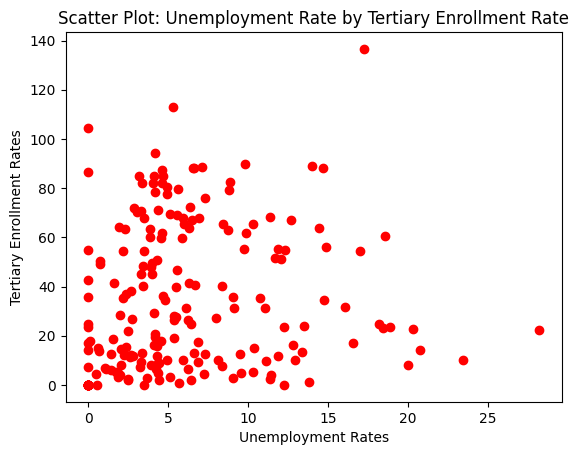

In [ ]:
# scatter plot of tertiary enrollment rates by unemployment rates
x = df['Unemployment_Rate']
y = df['Gross_Tertiary_Education_Enrollment']
plt.title("Scatter Plot: Unemployment Rate by Tertiary Enrollment Rate")
plt.xlabel("Unemployment Rates")
plt.ylabel("Tertiary Enrollment Rates")
plt.scatter(x, y, color="red")
plt.show()

In [ ]:
# ANALYSIS
  # When looking at the overall data, there appears to be a weak
  # negative correlation, suggesting that as x decreases, y increases.
  # In this case, this would mean that as unemployment decreases,
  # tertiary enrollment increases. This would also suggest that
  # as tertiary enrollment increases, unemployment decreases.

In [ ]:
# Get entries with higher than mean unemployment && lower than mean tertiary enrollment
areas = df4['Countries and areas'].values  # returns an array
unemp = df4['Unemployment_Rate'].values    # returns an array

area_ur = {}  # storing values in dictionary for convenience

# iterate over the arrays
i = 0
arr_len = len(unemp)
while i < arr_len:
  # set area name as key, unemployment rate as value
  area_ur[areas[i]] = unemp[i]
  i += 1

area_ur # check dictionary

{'Afghanistan': 11.12,
 'Angola': 6.89,
 'The Bahamas': 10.36,
 'Belize': 6.41,
 'Bosnia and Herzegovina': 18.42,
 'Botswana': 18.19,
 'Brunei': 9.12,
 'Burkina Faso': 6.26,
 'Cape Verde': 12.25,
 'Republic of the Congo': 9.47,
 'Djibouti': 10.3,
 'Equatorial Guinea': 6.43,
 'Gabon': 20.0,
 'The Gambia': 9.06,
 'Guyana': 11.85,
 'Haiti': 13.78,
 'Iraq': 12.82,
 'Jamaica': 8.0,
 'Lebanon': 6.23,
 'Lesotho': 23.41,
 'Maldives': 6.14,
 'Mali': 7.22,
 'Mauritania': 9.55,
 'Namibia': 20.27,
 'Nicaragua': 6.84,
 'Nigeria': 8.1,
 'Saint Lucia': 20.71,
 'Saint Vincent and the Grenadines': 18.88,
 'Samoa': 8.36,
 'Sï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿': 13.37,
 'Senegal': 6.6,
 'Somalia': 11.35,
 'South Africa': 28.18,
 'South Sudan': 12.24,
 'Sudan': 16.53,
 'Suriname': 7.33,
 'Tajikistan': 11.02,
 'Tunisia': 16.02,
 'Turkey': 13.49,
 'Yemen': 12.91,
 'Zambia': 11.43}

In [ ]:
# found flawed value in data, deleting from dictionary
area_ur.pop("Sï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿")
area_ur  # testing to make sure key:value was dropped

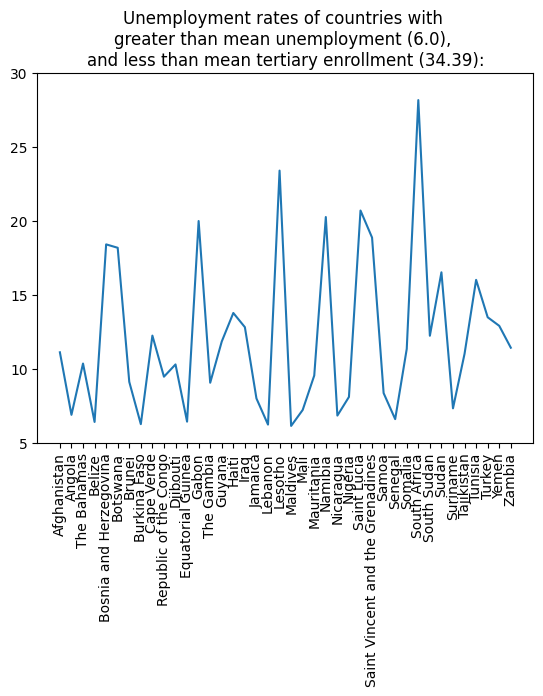

In [ ]:
# visualize to get a sense of how much higher than mean their unemployment rates are
y = area_ur.values()
x = area_ur.keys()
plt.plot(x, y)
plt.title("Unemployment rates of countries with \ngreater than mean unemployment (6.0), \nand less than mean tertiary enrollment (34.39):")
plt.xticks(rotation=90)  # rotate x labels for readability
plt.yticks(range(5, 35, 5))
plt.show()

In [ ]:
# prepare data for p-value testing
tert = df['Gross_Tertiary_Education_Enrollment']  # tertiary enrollment rates
ur = df['Unemployment_Rate']                      # unemployment rates

# create new dataframe with relevant data values
df_test = pd.DataFrame(tert)
df_test["Unemployment_Rate"] = ur
df_test.head()  # check data

,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,9.7,11.12
1,55.0,12.33
2,51.4,11.70
3,0.0,0.00
4,9.3,6.89


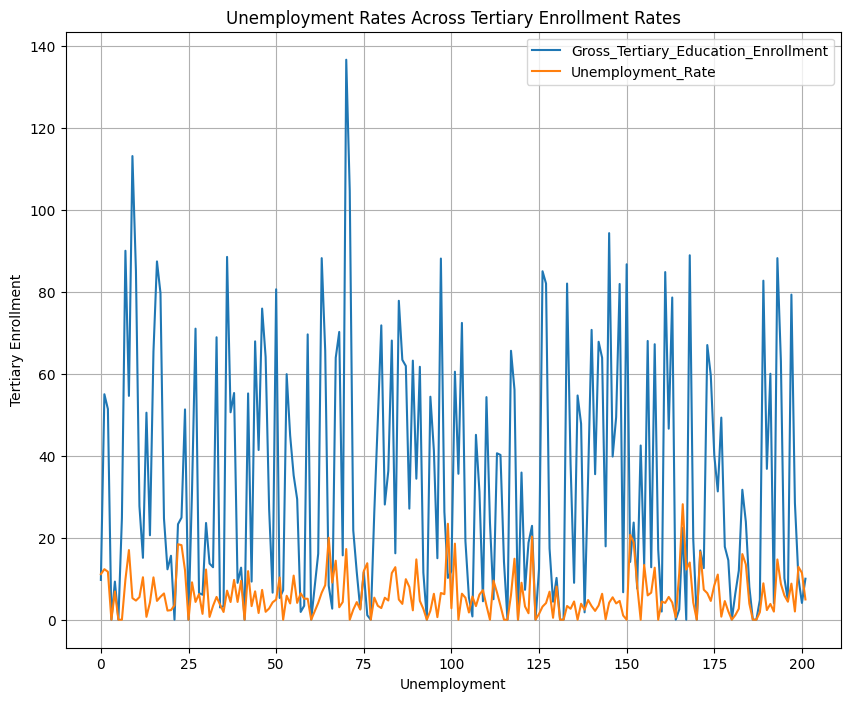

In [ ]:
# visualize new dataframe
df_test.plot(figsize=(10,8))
plt.title("Unemployment Rates Across Tertiary Enrollment Rates")
plt.xlabel("Unemployment")
plt.ylabel("Tertiary Enrollment")
plt.grid()
plt.show()

In [ ]:
# HYPOTHESES TESTING:
  # Null (Ho): Tertiary enrollment rate and unemployment rate are not significantly related.
  # Alt. (Ha): Tertiary enrollment rate and unemployment rate are signficantly related.

# pass in unemplyment rate values and tertiary enrollment values to conduct signifigance test
ttest_ind(ur, tert)

TtestResult(statistic=-13.2573897707865, pvalue=1.5630979756924524e-33, df=402.0)

In [ ]:
# CONCLUSION
  # Based on t-test results, there is not enough evidence of correlation
  # to reject the null hypothesis. Therefore, evidence suggests that
  # gross tertiary enrollment rates are not significantly related to
  # unemployment rates in a meaningful way.

# INSIGHTS
  # There does appear to some level of relation between tertiary
  # enrollment and unemployment rates. However, it is not enough
  # to justify correlation or using the values to predict each
  # other. This was also seen in the scatter plot for these values.

  # The assumption that education is related to the stregnth
  # of a labor market in a meaningful way feels intuitive.
  # Were I to move forward with this dataset in an effort to
  # quantify the correlation, I would explore the relationship
  # between unemployment and other variables.

  # If every relevant education statistic was found to not be
  # significantly related to unemployment rates, the next step
  # would be questioning my assumption that unemployment rates
  # meaningfully represented the stregnth of a labor market.